In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


## INTRODUCTION
Capstone project for Google Data Analytics Professional Certificate. Avocado are tasty and healthy and a super food with lots of offers: for example avocado cream, salads, smoothies, snacks and even sweet food.The dataset was proposed by the Google Growth Team and is spanning from January 4, 2015 to March 25, 2018,comprising of 18,249 observations and 14 columns.the data is made available on kaggle by Justin Kiggins. In this study I will be analysing historic data on avocado price and sales volume in multiple US regions. In this light, I will be making recommendation for better marketing strategies.

## 1. Ask
### Business Objective
Aanalyse the price of avocado which is continuous in nature of the two different types of avocado using the region in which they are sold. To answer questions like:
- How is the distribution of avocado price across the years.
- which avocado type has the highest price and which has the lowest price.
- which type of avocado is in high demand or mostly bought.
- which regions have the lowest and highest avocado prices.
- in which month and year was the most avocado sold.



## 2. Prepare
### Location of Data
Avocado Price, originally from [Hass Avocado Board](https://loveonetoday.com/how-to/identify-hass-avocados/) and (made available by [Justin Kiggins on Kaggle](https://www.kaggle.com/datasets/neuromusic/avocado-prices) under a CC0 license): Historical data about avocado prices and sales in grocery stores throughout the United States. The data includes information about the price of (Hass) avocados and the amount sold at different points in time (2015 -2018).

## 3. Process and Clean
In this analysis, I used Python and Jupyter Notebook to analyse, clean, perform summarisations and visualisations of the data. I choosed Python because of it ease of use and versatility as the best tool for this project.

### Setting python environment and Install required Libraries.

In [3]:
### Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')# this is to ignore unneccessary warnings.
%matplotlib inline

### Collecting data
Collecting and uploading the avocado csv dataset loading the dataset and processing it for analysis.

In [5]:
avocado = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")

In [6]:
avocado.head() # shift enter to run cell.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 3 Wrangling data
Preparing and Cleaning data ready for analysis Dropping 'Unnamed:0'column and verifying our data

In [7]:
avocado.drop("Unnamed: 0", axis =1, inplace = True) # dropping the column 'Unnamed:0' which happen to serve as an index column. 

In [8]:
avocado.head() # checking to see if index column has been dropped.

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avocado.shape # viewing the shape of the dataset.

(18249, 13)

In [10]:
avocado.info() # getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
#converting date column to date format and extracting the month
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['month']=avocado['Date'].dt.month

In [12]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [13]:
avocado.info()#checking if date has been properly converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


From the above, the date format looks good because it is in datetime format.

In [14]:
avocado['month'].unique() # checking for unique months.

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [16]:
avocado.nunique() # checking the number of unique values

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
month              12
dtype: int64

In [17]:
avocado.region.nunique() # checking the number of unique regions

54

In [18]:
# dropping region 'TotalUS' since that seems to be the total for US and not a particular region.
avocadoData = avocado.drop(avocado[avocado["region"]=="TotalUS"].index, inplace=True) 

In [20]:
avocado.region.nunique()

53

In [21]:
avocado.columns # the total columns for avocado

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [22]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [23]:
avocado.isnull().sum() # checking for nulls

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

Data has no missing values, looks good.

In [24]:
avocado.duplicated().sum()#checking for duplicated values

0

No duplicated values as well, look nice.

In [25]:
avocado.describe() # statistical information of the data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000,17911.000000,17911.000000
mean,1.407619,5.392587e+05,1.838074e+05,1.882231e+05,14551.234381,1.526757e+05,1.162029e+05,3.450569e+04,1967.168041,2016.147898,6.177210
std,0.404253,1.224332e+06,5.151059e+05,4.519856e+05,48817.536762,3.645992e+05,2.787596e+05,1.139477e+05,8186.402196,0.939939,3.534132
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.057102e+04,8.196600e+02,2.909610e+03,0.000000,4.905195e+03,2.700335e+03,1.129950e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.001541e+05,7.824430e+03,2.670199e+04,164.230000,3.755102e+04,2.453062e+04,2.459220e+03,0.000000,2016.000000,6.000000
75%,1.670000,4.001767e+05,1.014888e+05,1.317552e+05,5736.735000,1.036916e+05,7.928259e+04,1.942171e+04,106.760000,2017.000000,9.000000
max,3.250000,1.127475e+07,5.160897e+06,5.402444e+06,804558.250000,4.145407e+06,3.403581e+06,2.838239e+06,131300.760000,2018.000000,12.000000


In [26]:
avocado['type'].value_counts() # value count of the 2 avocado types

conventional    8957
organic         8954
Name: type, dtype: int64

From the above count we can see that conventional avocado are slightly more than organic type, we shall see this more in plots.

In [27]:
avocado['year'].value_counts() # value count of avocado by year

2017    5616
2016    5512
2015    5511
2018    1272
Name: year, dtype: int64

2017 appear to have a higher value count than all other years, but 2018 appear show some very significant low value counts. This is due to the fact that the data for 2018, was just from 3 month that January to March.

In [28]:
avocado['year'].unique() #getting the unique year

array([2015, 2016, 2017, 2018])

## 4. Conducting Visual Analysis
some plotting for avocado

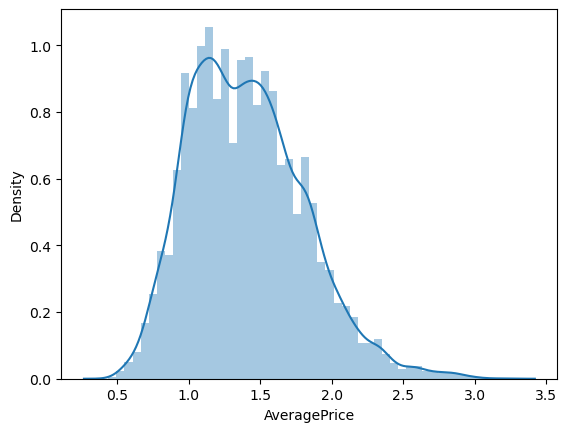

In [29]:
# let us check the price distribution of the types of avocado
sns.distplot(avocado['AveragePrice']); # checking distribution of annual average price

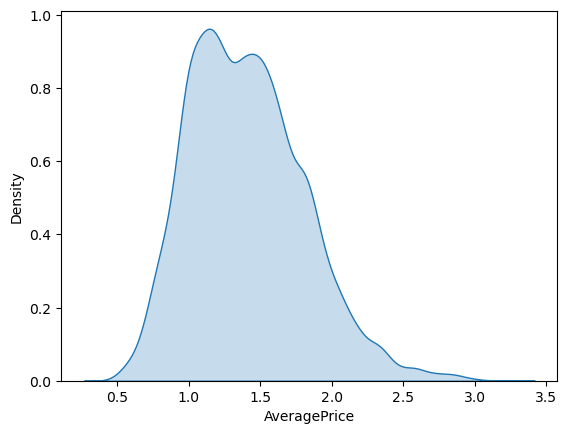

In [31]:
sns.kdeplot(avocado['AveragePrice'], shade = True);

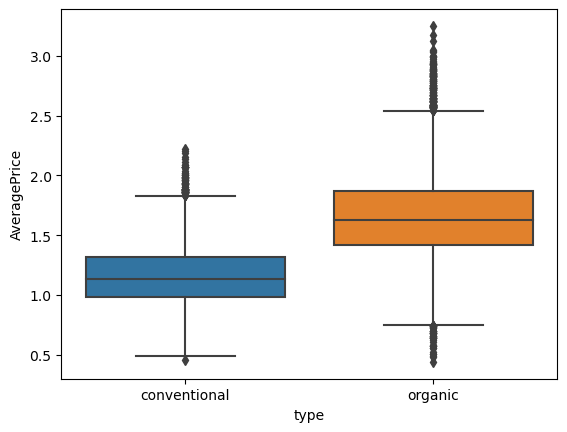

In [32]:
sns.boxplot(data= avocado, x="type", y = avocado["AveragePrice"]);

Looking at the above diagram, we can observe that both prices are averagely high, but a deep dive into the numbers, conventional avocados cost on average $1.16. Organic avocado on the other hand cost $1.65. In general the average avocado price is $1.4  with standared deviation of 0.40.

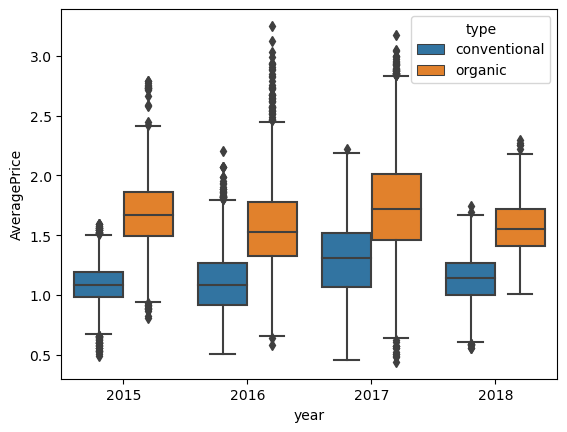

In [33]:
 sns.boxplot(data= avocado, x="year", y = avocado["AveragePrice"], hue='type');# price distribution over the years boxplot.

From the diagrams above we can clearly see that 2017 is the year with the highest average prices for both avocado types.

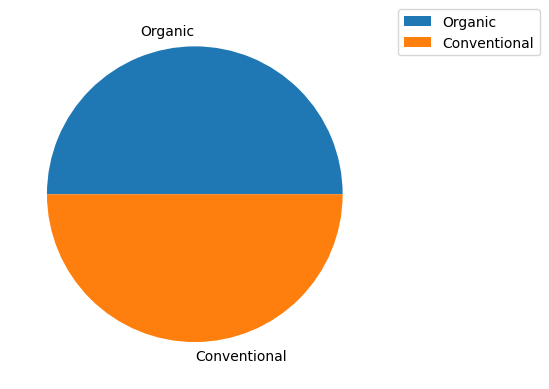

In [35]:
pie_chart=avocado['type'].value_counts()
mylab= ['Organic', 'Conventional']
plt.pie(pie_chart, labels =mylab)
plt.legend(title="avocado by type")
plt.legend(bbox_to_anchor= (1.05, 1), loc=2, borderaxespad=0);

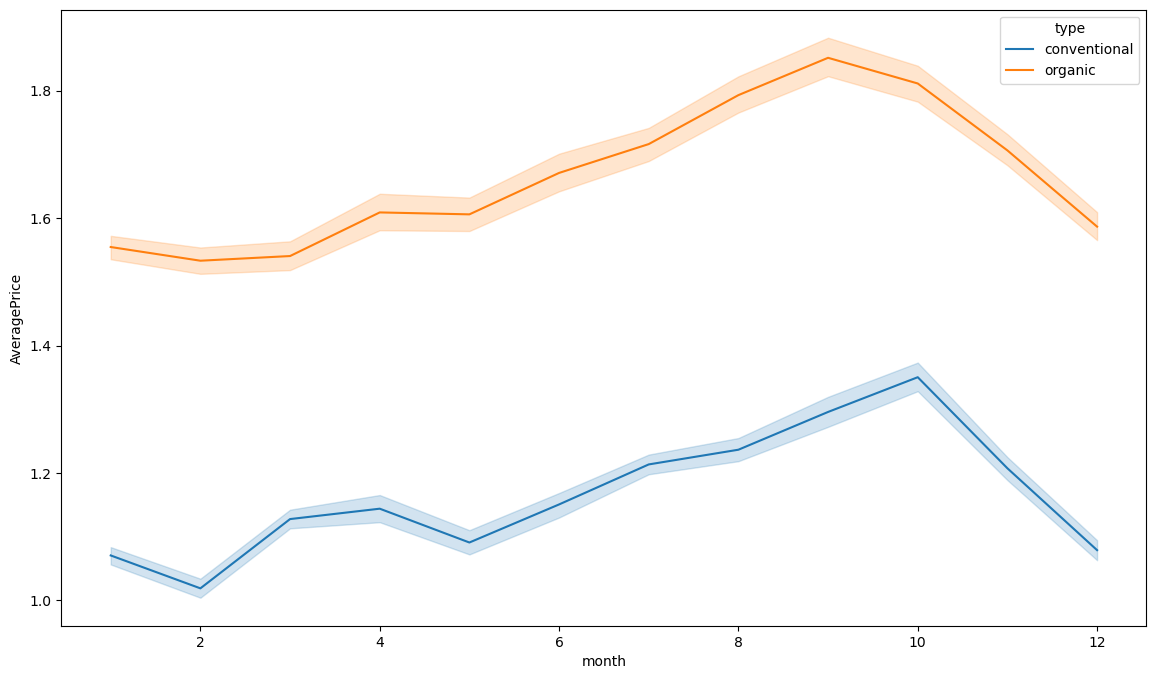

In [37]:
# avocado price distribution over the various months
plt.figure(figsize=(14, 8))
sns.lineplot(x= 'month', y = 'AveragePrice', data=avocado, hue ='type');

From the above we can infere that prices are down for both types of avocado in the months of January to Febuary and there is a price jump in the months from September to October and after that there is a sharp fall in price. This could be better seen on the plots below.

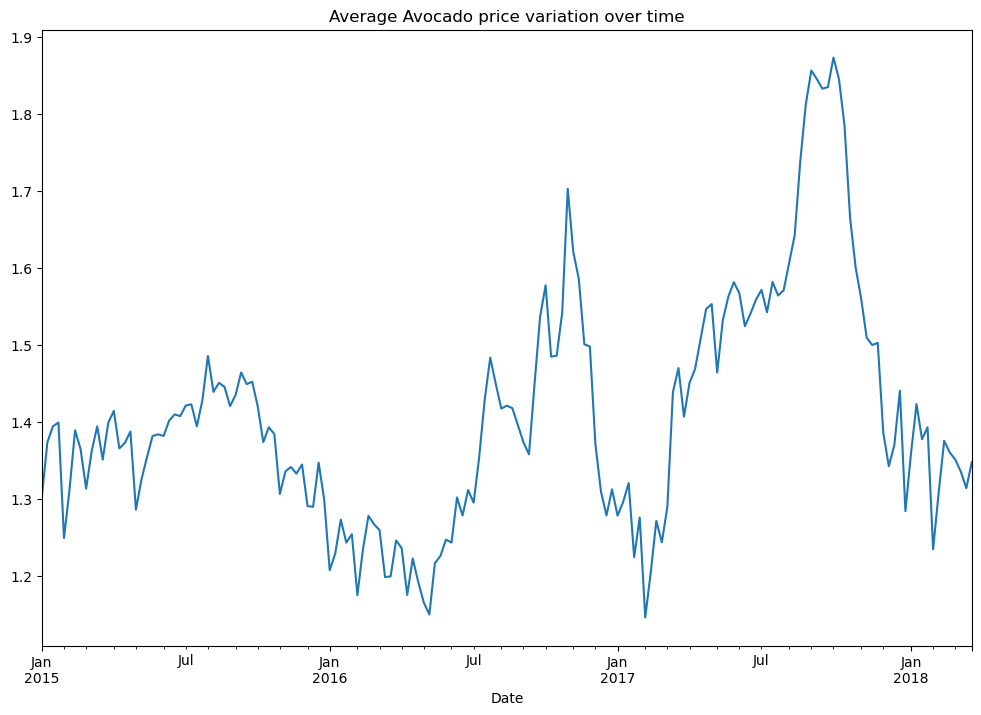

In [39]:
on_date= avocado.groupby('Date').mean()
plt.figure(figsize=(12, 8))
on_date['AveragePrice'].plot()
plt.title('Average Avocado price variation over time');

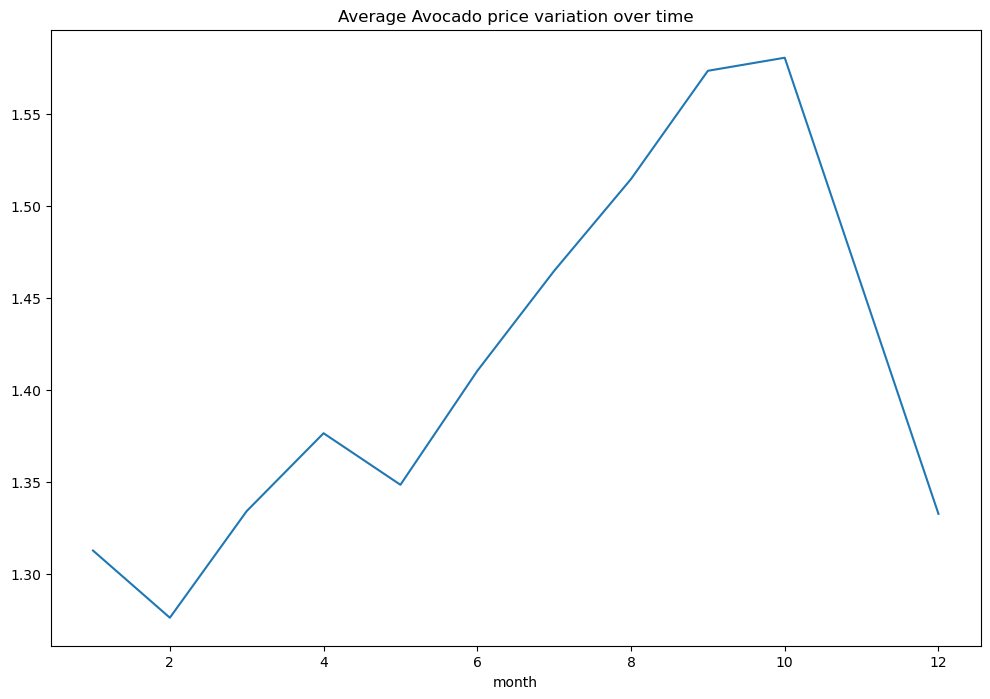

In [40]:
on_date= avocado.groupby('month').mean()
plt.figure(figsize=(12, 8))
on_date['AveragePrice'].plot()
plt.title('Average Avocado price variation over time');

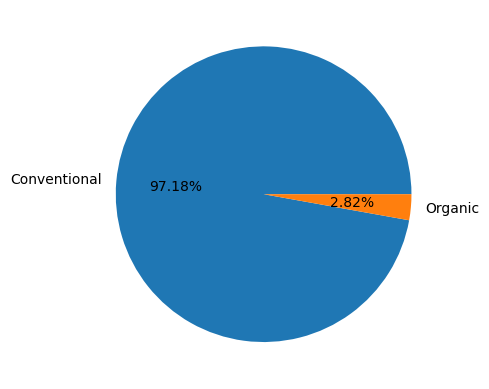

In [43]:
# Let us check the most popular type of avocado 
#most popular avocado type
plt.figure(figsize=plt.figaspect(1))
total_volume =avocado.groupby('type')['Total Volume'].sum()
plt.pie(total_volume, labels=['Conventional', 'Organic'], autopct='%.2f%%');

Looking at the total volume sold, conventional is the most in demand avocado type with about 97.18% while organic is left with just 2.82%. 

In [44]:
# sorting price to see most expesive region
most_expensive= avocado.sort_values(by=['AveragePrice'], ascending=False).head()
most_expensive

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
14125,2016-10-30,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco,10
17428,2017-04-16,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017,Tampa,4
14124,2016-11-06,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016,SanFrancisco,11
16055,2017-03-12,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017,MiamiFtLauderdale,3
16720,2017-08-27,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017,RaleighGreensboro,8


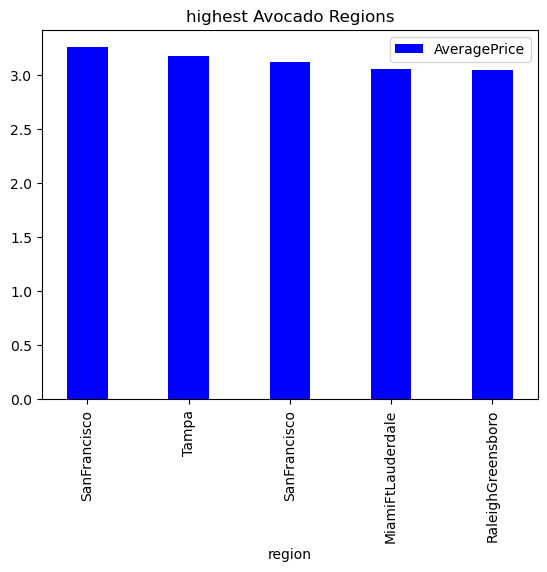

In [45]:
most_expensive.plot(x= 'region', y='AveragePrice', kind='bar', color='blue', width=0.4, title='highest Avocado Regions');

From the illustrations above we observe that San Francisco is the region with the highest avocado price from organic avocado ($3.25) and it was in the month of October, year of 2016.

In [46]:
#sorting price to see least expesive region
least_expensive= avocado.sort_values(by=['AveragePrice'], ascending=True).head()
least_expensive

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
15261,2017-03-05,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton,3
7412,2017-02-05,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson,2
15473,2017-03-05,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit,3
1716,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson,12
15262,2017-02-26,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton,2


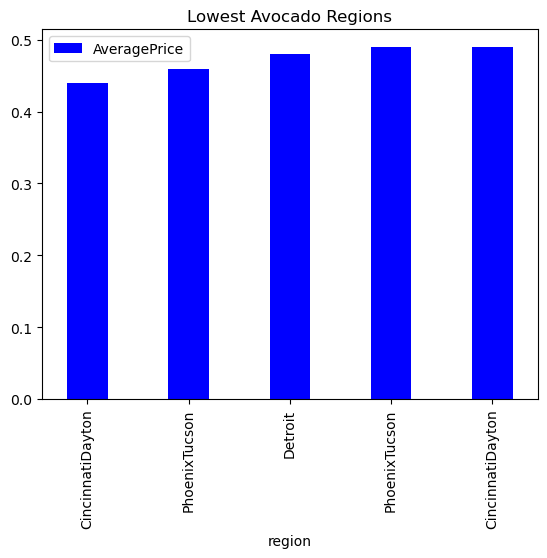

In [48]:
least_expensive.plot(x= 'region', y='AveragePrice', kind='bar', color='blue', width=0.4, title='Lowest Avocado Regions');

From the above, the least expensive region happens to be Cincinnati Dayton. Here, the lowest price came in from the Organic type ($0.44) in the month of March 2017.

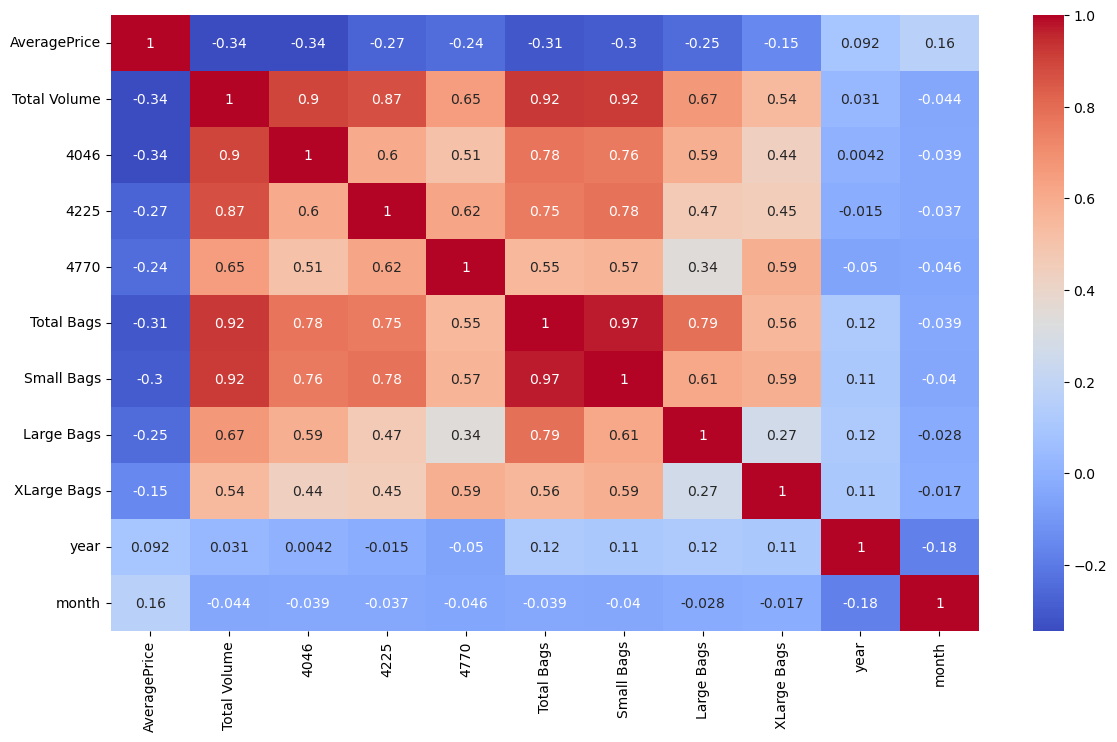

In [49]:
# Let's check to see some correlation between the variables.
plt.figure(figsize=(14, 8))
sns.heatmap(avocado.corr(), cmap='coolwarm', annot=True);

There appears to be a very strong correlation between Total volume and most of the variables. Equally, a very strong positive correlation between small bags and total bags.

## 5. Conclusion
Base on the above analysis and with close to 50:50 market share conventional 50.01% and organic 49.99%. Some recommendations could be made to the marketing strategy, although conventional avocado prices might be decreasing, it looks like there is an increased volume of avocados sold. The prices and avocado type sold varied across the regions. The lowest price of 0.44 dollars was recorded in Cincinnati Dayton and in march of 2017 which happened to be organic avocado, on the other hand, highest price of 3.25 dollars obtain in the region of San Francisco in October of 2016 still from Organic avocado. Looking at the total bags sold, we notice that a greater portion of the avocado where not sold in bags, in Seattle and some other regions, the where no avocado sold in bags. Mostly sold was Plu4225. Most of organic avocado where not sold in bag, but conventional where mostly sold in bags. However the postive correlation between total volume and small bags as well as total bags and small bags shows that small bags contributed the most to the total avocado sold. Also the organic appears to have high volitility because it has the lowerst and highest price, likewise the year 2017 appear to be very volitile as well. Having the most highest average price and lowest price at the same time.In all these Management will have to consider environmental, and other socio-economic conditions across these region that could have impact the avocado in the past 4 years.

## 6.Act
### Recomendation
Marketers should consider selling the avocado with plu4225 rather than in bags, but if the avocados are to be sold in bags, it should be Small bags because could sell quickly and in large volume.
Equally both type of avocado are recommended for sale, but organic mostly in urban and conventional in suburban regions.

## 7. What next
Some further analysis could still be carried on the dataset as well doing some machine learning and price prediction for the two types of avocado. For now it ends here.